In [1]:
# Loading our libraries : 
import pandas as pd # This library will help us in the cleaning of the dataset . 
import xml.etree.ElementTree as etree # This library will help us to read and format a xml files into a pandas dataframe.
import matplotlib.pyplot as plt # With this library we will visualize our EDA
import plotly.express as px # With this library we will visualize our geographical data .
import os # For paths 
import urllib.request # And for requests .

# Cleaning and EDA: 

In [2]:
tree = etree.parse("data/whc-en.xml") # Here we are loading the UNESCO data in xml format. 
root = tree.getroot() # Here we are getting the root which will lead us to every different node: 

In [3]:
columns = ["name", "region", "state", "image", "category", "inscription_date", "latitude", "longitude", "description"] # Let's rename the columns to more pythonic way.
unesco_data = pd.DataFrame(columns = columns) # Here we are replacing the changes to a original variable. 

In [4]:
for node in root: 
    name = node.find("site").text if node is not None else None
    region = node.find("region").text if node is not None else None
    state = node.find("states").text if node is not None else None
    image = node.find("image_url").text if node is not None else None
    category = node.find("category").text if node is not None else None
    inscription_date = node.find("date_inscribed").text if node is not None else None
    latitude = node.find("latitude").text if node is not None else None
    longitude = node.find("longitude").text if node is not None else None
    description = node.find("short_description").text if node is not None else None
    """
    This for loop finds the attributes for every node in every new item, though our data set.
    """
    
    unesco_data = unesco_data.append(pd.Series([name, region, state, image, category, inscription_date, latitude, longitude, description], index = columns), ignore_index = True)
    # Finally, we are filling the original variable, whict the new results. 

In [7]:
unesco_data.head(5) # Let's see if we have done everything correctly, so far : 

name  \
0  Ancient and Primeval Beech Forests of the Carp...   
1  Natural and Cultural Heritage of the Ohrid region   
2  The Architectural Work of Le Corbusier, an Out...   
3                     Qhapaq Ñan, Andean Road System   
4  Jesuit Missions of the Guaranis: San Ignacio M...   

                            region  \
0         Europe and North America   
1         Europe and North America   
2  Latin America and the Caribbean   
3  Latin America and the Caribbean   
4  Latin America and the Caribbean   

                                               state  \
0  Albania,Austria,Belgium,Bulgaria,Croatia,Germa...   
1                            Albania,North Macedonia   
2  Argentina,Belgium,France,Germany,India,Japan,S...   
3  Argentina,Bolivia (Plurinational State of),Chi...   
4                                   Argentina,Brazil   

                                               image  category  \
0  https://whc.unesco.org/uploads/sites/site_1133...   Natural   
1   https://whc.unesco.org/uploads/sites/site_99.jpg     Mixed   
2  https://whc.unesco.org/uploads/sites/site_1321...  Cultural   
3  https://whc.unesco.org/uploads/sites/site_1459...  Cultural   
4  https://whc.unesco.org/uploads/sites/site_275.jpg  Cultural   

  inscription_date        latitude       longitude  \
0             2007   49.0097222222   22.3388888889   
1             1979   40.9918333333   20.7041666667   
2             2016   46.4684138889    6.8293361111   
3             2014  -18.2500000000  -69.5916666667   
4             1983  -28.5433333300  -54.2658333300   

                                         description  
0  <p><span>This transboundary property stretches...  
1  <p>A superlative natural phenomenon, Lake Ohri...  
2  <p>Chosen from the work of Le Corbusier, the 1...  
3  <p>This site is an extensive Inca communicatio...  
4  <p>The ruins of S&atilde;o Miguel das Miss&oti...

In [8]:
unesco_data.dtypes # Let's inspect our data a little bit : 

name                object
region              object
state               object
image               object
category            object
inscription_date    object
latitude            object
longitude           object
description         object
dtype: object

In [9]:
categories = unesco_data.groupby("category").count() # Let's see how much categories we have, amoung our data set : 

In [10]:
categories # They are 3, and it seems the majority of the sites in the world registrated in UNESCO are from cultural kind. 

name  region  state  image  inscription_date  latitude  longitude  \
category                                                                      
Cultural   869     869    869    869               869       869        869   
Mixed       39      39     39     39                39        39         39   
Natural    213     213    213    213               213       213        213   

          description  
category               
Cultural          869  
Mixed              39  
Natural           213

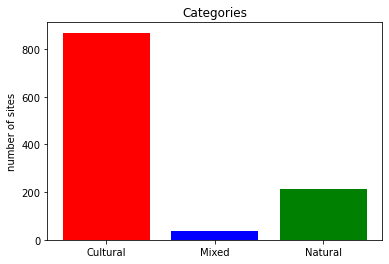

In [13]:
plt.bar(range(3), [categories.name[0], categories.name[1], categories.name[2]], color = ["red" , "blue", "green"]) # we will construct a bar chart with only the two smallest category, so we can see them clear. 
plt.title('Categories')
plt.xticks(range(3), ["Cultural", "Mixed", "Natural"]) # Here are our categories
plt.ylabel("number of sites")
plt.savefig("graphs/types")
plt.show()

In [14]:
unesco_data['inscription_date'] = pd.to_datetime(unesco_data['inscription_date'], errors='coerce') # Here we are applying a format onto our data column. 

In [15]:
unesco_data['inscription_date'] = unesco_data['inscription_date'].dt.year # As our column includes different observetions we will create a new column, which will store only the years.

In [16]:
unesco_data["inscription_date"] = unesco_data["inscription_date"].astype(int) # Changing the type to integer. 

In [17]:
def finding_all_cultural_sites(dataframe):
    """
    Returns all cultural sites.
    """
    cultural_sites = dataframe[(dataframe.category == 'Cultural')]
    return cultural_sites

In [26]:
all_cultural_sites = finding_all_cultural_sites(unesco_data) # This will find all cultural sites and put them in a variable.
print(all_cultural_sites) # This will print them . 

                                                   name  \
2     The Architectural Work of Le Corbusier, an Out...   
3                        Qhapaq Ñan, Andean Road System   
4     Jesuit Missions of the Guaranis: San Ignacio M...   
5            Prehistoric Pile Dwellings around the Alps   
6              Fertö / Neusiedlersee Cultural Landscape   
...                                                 ...   
1114                                 Old City of Sana'a   
1115                             Historic Town of Zabid   
1118                                       Matobo Hills   
1119                   Great Zimbabwe National Monument   
1120                      Khami Ruins National Monument   

                               region  \
2     Latin America and the Caribbean   
3     Latin America and the Caribbean   
4     Latin America and the Caribbean   
5            Europe and North America   
6            Europe and North America   
...                               ...   
1114

In [19]:
def get_categories_by_year_of_founding(dataframe):
    """
    This function will combine every dublicated year in our dataframe, thus we will have a number of registration per year . 
    """
    year = dataframe.groupby("inscription_date").count()
    return year

In [20]:
categories_attention = get_categories_by_year_of_founding(all_cultural_sites) # This put every cultural site in a year timeline. 
categories_attention = categories_attention.reset_index() # Let's reset the index .
print(categories_attention) # printing the result. 

    inscription_date  name  region  state  image  category  latitude  \
0               1978     8       8      8      8         8         8   
1               1979    34      34     34     34        34        34   
2               1980    22      22     22     22        22        22   
3               1981    15      15     15     15        15        15   
4               1982    17      17     17     17        17        17   
5               1983    19      19     19     19        19        19   
6               1984    15      15     15     15        15        15   
7               1985    25      25     25     25        25        25   
8               1986    23      23     23     23        23        23   
9               1987    32      32     32     32        32        32   
10              1988    19      19     19     19        19        19   
11              1989     4       4      4      4         4         4   
12              1990    11      11     11     11        11      

In [21]:
def finding_all_mixed_sites(dataframe):
    """
    Returns all mixed sites in the data set.
    """
    mixed_sites = dataframe[(dataframe.category == 'Mixed')]
    return mixed_sites

In [25]:
all_mixed_sites = finding_all_mixed_sites(unesco_data) # This will mixed sites in the data set and put them in a variable.
categories_attention1 = get_categories_by_year_of_founding(all_mixed_sites) # This will put them in the timeline.
categories_attention1 = categories_attention1.reset_index() # This reset the index . 

In [23]:
def finding_all_natural_sites(dataframe):
    """
    Returns all natural sites in the data set .
    """
    natural_sites = dataframe[(dataframe.category == 'Natural')]
    return natural_sites

In [24]:
all_natural_sites = finding_all_natural_sites(unesco_data) # This will find all natural sites in the data set, and put them in a variable. 
categories_attention2 = get_categories_by_year_of_founding(all_natural_sites) # This will put them in a timeline. 
categories_attention2 = categories_attention2.reset_index() # This will reset the index. 

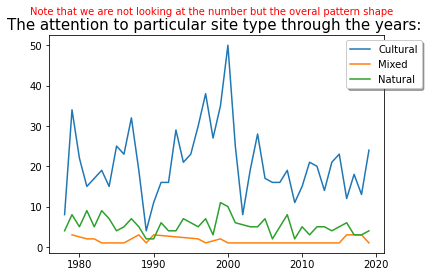

In [27]:
plt.plot(categories_attention.inscription_date, categories_attention.name, label = "Cultural")
plt.plot(categories_attention1.inscription_date, categories_attention1.name, label = "Mixed")
plt.plot(categories_attention2.inscription_date, categories_attention2.name, label = "Natural")
plt.legend(loc='upper center', bbox_to_anchor=(1, 1), shadow=True, ncol=1, fontsize= 10)
plt.title('The attention to particular site type through the years: ', fontsize=15)
plt.suptitle('Note that we are not looking at the number but the overal pattern shape', fontsize=10, color = "red") 
plt.savefig("graphs/attention")
plt.show()

The explanation about the peak for the beginning of 21 century: 
Shortly   after   the publication   of   the   1987 Bruntland   Report,which   established   that development  was  supported  by  three  pillars -economy,  society  and  environment -the linkages between culture and development was further demonstrated by the United Nations launch   of   the   World   Decade   for   Cultural   Development   (1988-1997),   whose   defining 
Page 2achievement  was  the  report titled Our  Creative  Diversity,produced  for  UNESCO  by  an independent Commission chaired by J. Pérez de Cuellar in 1995. However itwas not untilthe Stockholm Conference on Cultural Policies  for Development in 1998  and  the  Johannesburg World Summit onSustainable  Development  held  in  2002  that culture   was   acknowledged   as  the   fourth   pillar   of   sustainable   development   alongside economic, social and environmental factors.
https://unesdoc.unesco.org/ark:/48223/pf0000225460

In [29]:
regions = unesco_data.groupby("region").count() # grouping the sites in respect of their region .

In [30]:
regions # Lets see, which regions have more UNESCO sites :

name  state  image  category  \
region                                                          
Africa                             96     96     96        96   
Arab States                        86     86     86        86   
Asia and the Pacific              268    268    268       268   
Europe and North America          528    528    528       528   
Latin America and the Caribbean   143    143    143       143   

                                 inscription_date  latitude  longitude  \
region                                                                   
Africa                                         96        96         96   
Arab States                                    86        86         86   
Asia and the Pacific                          268       268        268   
Europe and North America                      528       528        528   
Latin America and the Caribbean               143       143        143   

                                 description  
region                                        
Africa                                    96  
Arab States                               86  
Asia and the Pacific                     268  
Europe and North America                 528  
Latin America and the Caribbean          143

<Figure size 432x288 with 0 Axes>

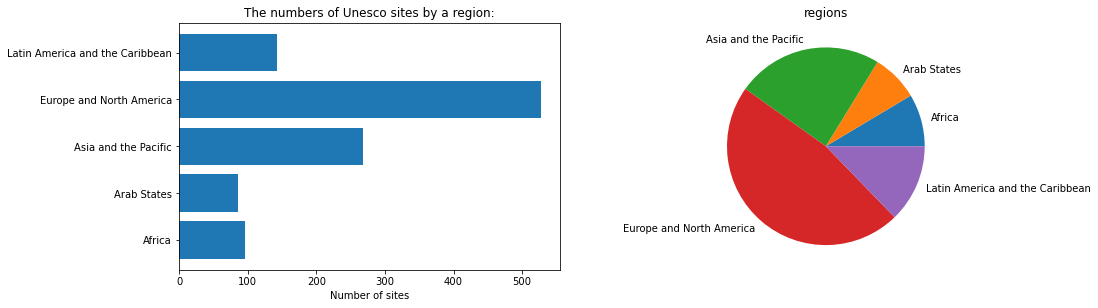

In [31]:
plt.figure() # Here we create a figure, which will be used for subploting. 
plt.figure(figsize=(15,10))
plt.subplot(2,2,1) #This is our first figure, which shows the name and the number of our result data frame. 
plt.barh(regions.index, regions.name)
plt.xlabel('Number of sites')
plt.title('The numbers of Unesco sites by a region:')

plt.subplot(2,2,2) 
plt.pie(regions.name, labels = regions.index)
plt.title('regions')
plt.savefig("graphs/regions")
plt.show()

# It is pretty evident why the Europe is called "The old Continent" and have a huge cultural significance .

In [33]:
states = unesco_data.groupby("state").count() # Now lets group the sits more deeply. 

In [34]:
states # By their state of origin . 

name  region  image  \
state                                                                     
Afghanistan                                            2       2      2   
Albania                                                2       2      2   
Albania,Austria,Belgium,Bulgaria,Croatia,German...     1       1      1   
Albania,North Macedonia                                1       1      1   
Algeria                                                7       7      7   
...                                                  ...     ...    ...   
Venezuela (Bolivarian Republic of)                     3       3      3   
Viet Nam                                               8       8      8   
Yemen                                                  4       4      4   
Zambia,Zimbabwe                                        1       1      1   
Zimbabwe                                               4       4      4   

                                                    category  \
state                                                          
Afghanistan                                                2   
Albania                                                    2   
Albania,Austria,Belgium,Bulgaria,Croatia,German...         1   
Albania,North Macedonia                                    1   
Algeria                                                    7   
...                                                      ...   
Venezuela (Bolivarian Republic of)                         3   
Viet Nam                                                   8   
Yemen                                                      4   
Zambia,Zimbabwe                                            1   
Zimbabwe                                                   4   

                                                    inscription_date  \
state                                                                  
Afghanistan                                                        2   
Albania                                                            2   
Albania,Austria,Belgium,Bulgaria,Croatia,German...                 1   
Albania,North Macedonia                                            1   
Algeria                                                            7   
...                                                              ...   
Venezuela (Bolivarian Republic of)                                 3   
Viet Nam                                                           8   
Yemen                                                              4   
Zambia,Zimbabwe                                                    1   
Zimbabwe                                                           4   

                                                    latitude  longitude  \
state                                                                     
Afghanistan                                                2          2   
Albania                                                    2          2   
Albania,Austria,Belgium,Bulgaria,Croatia,German...         1          1   
Albania,North Macedonia                                    1          1   
Algeria                                                    7          7   
...                                                      ...        ...   
Venezuela (Bolivarian Republic of)                         3          3   
Viet Nam                                                   8          8   
Yemen                                                      4          4   
Zambia,Zimbabwe                                            1          1   
Zimbabwe                                                   4          4   

                                                    description  
state                                                            
Afghanistan                                                   2  
Albania                                                       2  
Albania,Austria,Belgium,Bulgaria,Croatia,German...            1  


In [35]:
states.name.unique() # I am curios , how much different numbers of UNESCO sites have the different countries. 

array([ 2,  1,  7,  8,  3, 20, 10,  6, 21,  9, 18,  5, 54, 13,  4, 41, 39,
       37, 24, 49, 22, 35, 11, 16, 14, 25, 44, 31])

In [36]:
states.name.max() # Which is the biggest number of UNESCO sites for a country  ?

54

In [37]:
states.name.min() # Which is the minumum ? 

1

In [38]:
def get_states_category_by_amount(dataframe):
    """
    Returns, three separated categories by the number of UNESCO sites in the state : 
    """
    few, average, many = (0, 0, 0) #those are the different categories .
    few = len(dataframe[dataframe.name <= 10]) #this is for the countries with less than 10 sites.
    average = len(dataframe[(dataframe.name > 10) & (dataframe.name <= 25)]) #this is for the countris with less than 25 sites.
    many = len(dataframe[dataframe.name > 25]) #this is for the most cultural countries, with more than 25 sites recognized by UNESCO.
    return few, average, many

In [39]:
few, average, many = get_states_category_by_amount(states)  # Lets called the function above, and store it in a variable : 

<Figure size 432x288 with 0 Axes>

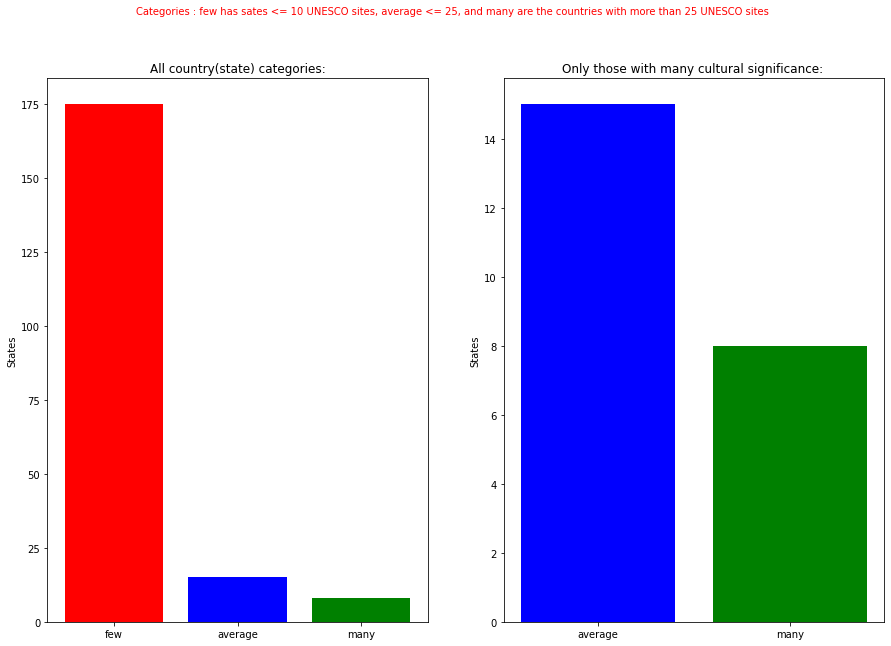

In [41]:
# Lets visualize the different categories : 
plt.figure()
plt.figure(figsize=(15,10))# Here we create a figure, which will be used for subploting. 
plt.subplot(121) #This is our first figure, which shows the category and the numbers of our result. 
plt.bar(range(3), [few, average, many], color = ["red" , "blue", "green"]) # we will construct a bar chart with those three variables for every category.
plt.title('All country(state) categories:')
plt.suptitle('Categories : few has sates <= 10 UNESCO sites, average <= 25, and many are the countries with more than 25 UNESCO sites', fontsize=10, color = "red")
plt.xticks(range(3), ["few", "average", "many"])
plt.ylabel("States")


plt.subplot(122) #This is our second figure, which shows only the categories about countris with more than 10 UNESCO sites .
plt.bar(range(2), [average, many], color = ["blue", "green"]) # we will construct a bar chart with only the two smallest category, so we can see them clear. 
plt.title('Only those with many cultural significance: ')
plt.xticks(range(2), ["average", "many"])
plt.ylabel("States")
plt.savefig('graphs/states')
plt.show() # Now we are visualize the sizes of our three categories. 

In [42]:
countries = states[states.name > 10] # I am curios about the names of those countries . 

In [43]:
countries # So, lets see them : 

name  region  image  \
state                                                                     
Australia                                             20      20     20   
Brazil                                                21      21     21   
Canada                                                18      18     18   
China                                                 54      54     54   
Czechia                                               13      13     13   
France                                                41      41     41   
Germany                                               39      39     39   
Greece                                                18      18     18   
India                                                 37      37     37   
Iran (Islamic Republic of)                            24      24     24   
Italy                                                 49      49     49   
Japan                                                 22      22     22   
Mexico                                                35      35     35   
Peru                                                  11      11     11   
Poland                                                13      13     13   
Portugal                                              16      16     16   
Republic of Korea                                     14      14     14   
Russian Federation                                    25      25     25   
Spain                                                 44      44     44   
Sweden                                                13      13     13   
Turkey                                                18      18     18   
United Kingdom of Great Britain and Northern Ir...    31      31     31   
United States of America                              22      22     22   

                                                    category  \
state                                                          
Australia                                                 20   
Brazil                                                    21   
Canada                                                    18   
China                                                     54   
Czechia                                                   13   
France                                                    41   
Germany                                                   39   
Greece                                                    18   
India                                                     37   
Iran (Islamic Republic of)                                24   
Italy                                                     49   
Japan                                                     22   
Mexico                                                    35   
Peru                                                      11   
Poland                                                    13   
Portugal                                                  16   
Republic of Korea                                         14   
Russian Federation                                        25   
Spain                                                     44   
Sweden                                                    13   
Turkey                                                    18   
United Kingdom of Great Britain and Northern Ir...        31   
United States of America                                  22   

                                                    inscription_date  \
state                                                                  
Australia                                                         20   
Brazil                                                            21   
Canada                                                            18   
China                                                             54   
Czechia                                                           13   
France                                                            41   

<Figure size 432x288 with 0 Axes>

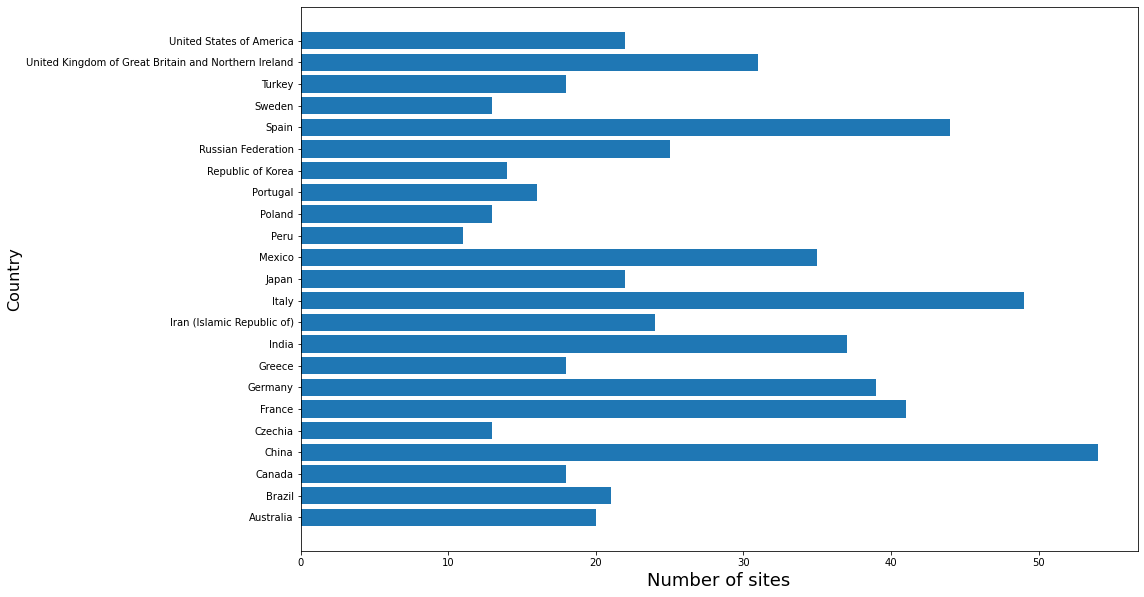

In [44]:
# The visualization will compare them more clearly: 
plt.figure()
plt.figure(figsize=(15,10))
plt.barh(countries.index, countries.name)
plt.xlabel('Number of sites', fontsize=18)
plt.ylabel('Country', fontsize=16)
plt.savefig('graphs/most_cultural_countries')
plt.show()

In [46]:
more_than_fourty = states[states.name > 40] # Lets search deeper !

In [47]:
more_than_fourty # Only 4 countries have more than 40 UNESCO sites :

name  region  image  category  inscription_date  latitude  longitude  \
state                                                                          
China     54      54     54        54                54        54         54   
France    41      41     41        41                41        41         41   
Italy     49      49     49        49                49        49         49   
Spain     44      44     44        44                44        44         44   

        description  
state                
China            54  
France           41  
Italy            49  
Spain            44

In [48]:
Bulgaria = unesco_data[unesco_data.state == 'Bulgaria'] # As I am Bulgarian, I am curios about mine country most. 
Bulgaria # Thus, Lets see how much UNESCO sites, we have and which are they:  

name                    region     state  \
146                  Boyana Church  Europe and North America  Bulgaria   
147                   Madara Rider  Europe and North America  Bulgaria   
148      Thracian Tomb of Kazanlak  Europe and North America  Bulgaria   
149  Rock-Hewn Churches of Ivanovo  Europe and North America  Bulgaria   
150                 Rila Monastery  Europe and North America  Bulgaria   
151       Ancient City of Nessebar  Europe and North America  Bulgaria   
152     Thracian Tomb of Sveshtari  Europe and North America  Bulgaria   
153        Srebarna Nature Reserve  Europe and North America  Bulgaria   
154            Pirin National Park  Europe and North America  Bulgaria   

                                                 image  category  \
146   https://whc.unesco.org/uploads/sites/site_42.jpg  Cultural   
147   https://whc.unesco.org/uploads/sites/site_43.jpg  Cultural   
148   https://whc.unesco.org/uploads/sites/site_44.jpg  Cultural   
149   https://whc.unesco.org/uploads/sites/site_45.jpg  Cultural   
150  https://whc.unesco.org/uploads/sites/site_216.jpg  Cultural   
151  https://whc.unesco.org/uploads/sites/site_217.jpg  Cultural   
152  https://whc.unesco.org/uploads/sites/site_359.jpg  Cultural   
153  https://whc.unesco.org/uploads/sites/site_219.jpg   Natural   
154  https://whc.unesco.org/uploads/sites/site_225.jpg   Natural   

     inscription_date       latitude      longitude  \
146              1979  42.6500000000  23.2666666700   
147              1979  43.3000000000  27.1500000000   
148              1979  42.6166666700  25.4000000000   
149              1979  43.7166666700  25.9666666700   
150              1983  42.1166666700  23.4000000000   
151              1983  42.6561100000  27.7300000000   
152              1985  43.6666700000  26.6666700000   
153              1983  44.1144400000  27.0780600000   
154              1983  41.7427222222  23.4304722222   

                                           description  
146  <p>Located on the outskirts of Sofia, Boyana C...  
147  <p>The Madara Rider, representing the figure o...  
148  <p>Discovered in 1944, this tomb dates from th...  
149  <p>In the valley of the Roussenski Lom River, ...  
150  <p>Rila Monastery was founded in the 10th cent...  
151  <p>Situated on a rocky peninsula on the Black ...  
152  <p>Discovered in 1982 near the village of Sves...  
153  <p>The Srebarna Nature Reserve is a freshwater...  
154  <p>Spread over an area of over 27,000 ha, at a...

In [49]:
def createFolder(directory): # Now we are creating function, which in turn will create a folders, whenever we want.
    """
    Creates a folder.
    """
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

In [50]:
createFolder('./Bulgaria/') # We are creating folder, which will store the images from the sites in Bulgaria 

In [51]:
file_path = './Bulgaria/' # This variable is the path to the folder. 
urls = list(Bulgaria["image"]) # This variable stores the path to the image. 

In [52]:
def url_to_jpg(i, url, file_path): # This function will find our image, and then downloaded and stored it in a specific folder.
    """
    Saves our image in the file path variable. 
    """
    file_name = 'Bulgaria-{}'.format(i)  
    full_path = '{}{}'.format(file_path, file_name) 
    urllib.request.urlretrieve(url, full_path) 
    
    print('{} saved.'.format(file_name))
    return None 

In [53]:
for i, url in enumerate(urls): # Here we call the function above and used it in a for loop. 
     url_to_jpg(i, url, file_path) 

Bulgaria-0 saved.
Bulgaria-1 saved.
Bulgaria-2 saved.
Bulgaria-3 saved.
Bulgaria-4 saved.
Bulgaria-5 saved.
Bulgaria-6 saved.
Bulgaria-7 saved.
Bulgaria-8 saved.


# Let's compare the cultural countries among each other in respect to their "Coefficent of Cultural Significance" : 

In [54]:
cultural_states = all_cultural_sites.groupby("state").count() # For the reason we need to find every cultural site , and put it in a group of its own country.
cultural_states = cultural_states.reset_index() # Here we need to reset the index .
cultural_states.head(5) # Let's inspect the result : 

state  name  region  image  category  inscription_date  latitude  \
0  Afghanistan     2       2      2         2                 2         2   
1      Albania     2       2      2         2                 2         2   
2      Algeria     6       6      6         6                 6         6   
3      Andorra     1       1      1         1                 1         1   
4       Angola     1       1      1         1                 1         1   

   longitude  description  
0          2            2  
1          2            2  
2          6            6  
3          1            1  
4          1            1

In [55]:
cultural_states = cultural_states.drop(columns = ['region', "image", "category", "inscription_date", "latitude", "longitude", "description"])
# Here we are droping unuseful columns. 

In [56]:
cultural_states.columns = ['state', 'sites'] # And rename the useful ones . 

In [57]:
cultural_states # Let's inspect what we have done so far : 

state  sites
0                           Afghanistan      2
1                               Albania      2
2                               Algeria      6
3                               Andorra      1
4                                Angola      1
..                                  ...    ...
162                             Vanuatu      1
163  Venezuela (Bolivarian Republic of)      2
164                            Viet Nam      5
165                               Yemen      3
166                            Zimbabwe      3

[167 rows x 2 columns]

In [58]:
countries = pd.read_csv("data/countries.csv") # For the reason we have need from a separate different set, which store a deep information about the countries :

In [59]:
countries.head(5) # Let's see it : 

Country                               Region  Population  \
0     Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1         Albania   EASTERN EUROPE                          3581655   
2         Algeria   NORTHERN AFRICA                        32930091   
3  American Samoa   OCEANIA                                   57794   
4         Andorra   WESTERN EUROPE                            71201   

   Area (sq. mi.) Pop. Density (per sq. mi.) Coastline (coast/area ratio)  \
0          647500                       48,0                         0,00   
1           28748                      124,6                         1,26   
2         2381740                       13,8                         0,04   
3             199                      290,4                        58,29   
4             468                      152,1                         0,00   

  Net migration Infant mortality (per 1000 births)  GDP ($ per capita)  \
0         23,06                             163,07               700.0   
1         -4,93                              21,52              4500.0   
2         -0,39                                 31              6000.0   
3        -20,71                               9,27              8000.0   
4           6,6                               4,05             19000.0   

  Literacy (%) Phones (per 1000) Arable (%) Crops (%) Other (%) Climate  \
0         36,0               3,2      12,13      0,22     87,65       1   
1         86,5              71,2      21,09      4,42     74,49       3   
2         70,0              78,1       3,22      0,25     96,53       1   
3         97,0             259,5         10        15        75       2   
4        100,0             497,2       2,22         0     97,78       3   

  Birthrate Deathrate Agriculture Industry Service  
0      46,6     20,34        0,38     0,24    0,38  
1     15,11      5,22       0,232    0,188   0,579  
2     17,14      4,61       0,101      0,6   0,298  
3     22,46      3,27         NaN      NaN     NaN  
4      8,71      6,25         NaN      NaN     NaN

In [60]:
countries.columns # It have a lot of columns, and we have need only from one or two of them : 

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [61]:
countries = countries.drop(columns = ['Region', "Pop. Density (per sq. mi.)", "Coastline (coast/area ratio)", "Net migration", "Infant mortality (per 1000 births)", "GDP ($ per capita)", "Literacy (%)", "Phones (per 1000)", "Arable (%)", "Crops (%)", "Other (%)", "Climate", "Birthrate", "Deathrate", "Agriculture", "Industry", "Service"])
# For that reason, we are droping the unuseful ones . 

In [62]:
countries.columns # Now we have only :  

Index(['Country', 'Population', 'Area (sq. mi.)'], dtype='object')

In [63]:
countries.columns = ['state', 'population', 'area'] # However, we need to rename them to look more Pythonic : 

In [64]:
countries # Now, everything need to be perfect :  

state  population     area
0       Afghanistan     31056997   647500
1           Albania      3581655    28748
2           Algeria     32930091  2381740
3    American Samoa        57794      199
4           Andorra        71201      468
..               ...         ...      ...
222       West Bank      2460492     5860
223  Western Sahara       273008   266000
224           Yemen     21456188   527970
225          Zambia     11502010   752614
226        Zimbabwe     12236805   390580

[227 rows x 3 columns]

In [65]:
countries["state"] = countries["state"].str.strip() # After , a trying I noted that the name of countries in the dataframes are writen different. 
# For instance, in  the second one we have a space after the last letter, and this is a problem for the system to identify them as a equal later in our 
# process . For the reason, we are getting rid of that space, with the code above .

In [66]:
coefficient = pd.merge(countries, cultural_states, how='inner', on='state') # Now, we can merge the two datasets without a problem . 

In [67]:
coefficient # Let's see if everything is perfect : 

state  population     area  sites
0    Afghanistan    31056997   647500      2
1        Albania     3581655    28748      2
2        Algeria    32930091  2381740      6
3        Andorra       71201      468      1
4         Angola    12127071  1246700      1
..           ...         ...      ...    ...
117      Uruguay     3431932   176220      2
118   Uzbekistan    27307134   447400      4
119      Vanuatu      208869    12200      1
120        Yemen    21456188   527970      3
121     Zimbabwe    12236805   390580      3

[122 rows x 4 columns]

In [68]:
def calculate_area(row): 
    """
    This function will calculate our "Coefficient of Cultural Significance"
    """
    return row['sites'] / row['area']

In [69]:
coefficient['coefficient'] = coefficient.apply(calculate_area, axis=1) # Here we are using the function, and save the result in a new column.
coefficient # Lets see it : 

state  population     area  sites   coefficient
0    Afghanistan    31056997   647500      2  3.088803e-06
1        Albania     3581655    28748      2  6.957006e-05
2        Algeria    32930091  2381740      6  2.519167e-06
3        Andorra       71201      468      1  2.136752e-03
4         Angola    12127071  1246700      1  8.021176e-07
..           ...         ...      ...    ...           ...
117      Uruguay     3431932   176220      2  1.134945e-05
118   Uzbekistan    27307134   447400      4  8.940545e-06
119      Vanuatu      208869    12200      1  8.196721e-05
120        Yemen    21456188   527970      3  5.682141e-06
121     Zimbabwe    12236805   390580      3  7.680885e-06

[122 rows x 5 columns]

In [70]:
coefficient.coefficient.nlargest(10) # To find the top 10 countries, I need to know their coefficient.

95    0.016393
69    0.009494
10    0.004511
12    0.002320
3     0.002137
99    0.001443
72    0.000980
61    0.000481
53    0.000433
64    0.000387
Name: coefficient, dtype: float64

In [71]:
def get_top_ten_coef(dataframe):
    """
    RReturns the top ten countries with higher coefficient .
    """
    top_ten = dataframe[dataframe.coefficient > 0.000387] # As , we already know the coefficent of the 10th country, we can easly return everyother ones before it. 
    return top_ten

In [72]:
top = get_top_ten_coef(coefficient) # Here we are loading the return in a variable
most_cultural_countries = top.sort_values(by=['coefficient'], ascending=False) # Here we are sorting the result . 

In [73]:
most_cultural_countries # Now, we can clearly see which contries have the highest coefficient : 

state  population   area  sites  coefficient
95  San Marino       29251     61      1     0.016393
69       Malta      400214    316      3     0.009494
10     Bahrain      698585    665      3     0.004511
12    Barbados      279912    431      1     0.002320
3      Andorra       71201    468      1     0.002137
99   Singapore     4492150    693      1     0.001443
72   Mauritius     1240827   2040      2     0.000980
61     Lebanon     3874050  10400      5     0.000481
53      Israel     6352117  20770      9     0.000433

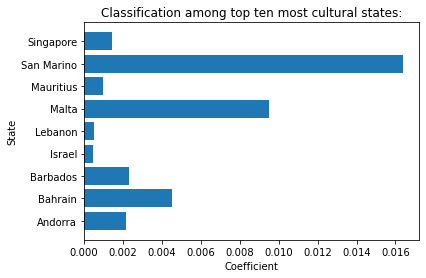

In [74]:
# Also, we can visualize it : 
plt.barh(top.state, top.coefficient)
plt.title('Classification among top ten most cultural states:')
plt.ylabel("State")
plt.xlabel("Coefficient")
plt.savefig('graphs/top_ten_most_cultural_states')
plt.show()

In [75]:
coefficient[coefficient['state'].str.contains(r'Bulgaria')] # However, I want to see on which possition is my own country . 

state  population    area  sites  coefficient
18  Bulgaria     7385367  110910      7     0.000063

In [76]:
coefficient.coefficient.nlargest(40) # As I have Bulgaria's coefficiet I can eassily navigate to where need to be my next function . 

95     0.016393
69     0.009494
10     0.004511
12     0.002320
3      0.002137
99     0.001443
72     0.000980
61     0.000481
53     0.000433
64     0.000387
14     0.000328
28     0.000324
79     0.000217
29     0.000162
92     0.000162
54     0.000153
107    0.000145
43     0.000121
41     0.000106
26     0.000106
100    0.000102
6      0.000101
103    0.000091
93     0.000087
70     0.000084
8      0.000083
119    0.000082
102    0.000079
1      0.000070
39     0.000066
47     0.000064
27     0.000063
18     0.000063
37     0.000055
55     0.000048
33     0.000048
98     0.000045
56     0.000043
40     0.000043
111    0.000043
Name: coefficient, dtype: float64

In [77]:
def get_top_fourty_coef(dataframe):
    """
    Returns, the first fourty countries. Hopefully we were right and Bulgaria is among them .
    """
    top_fourty = dataframe[dataframe.coefficient > 0.000043] #this is for the painters with less than 10 paintings.
    return top_fourty

In [78]:
top_fourty = get_top_fourty_coef(coefficient) # This variable stores the result . 
highest_fourty = top_fourty.sort_values(by=['coefficient'], ascending=False) # And here the result is sorted . 

In [79]:
highest_fourty # Now lets see it . 

state  population    area  sites  coefficient
95         San Marino       29251      61      1     0.016393
69              Malta      400214     316      3     0.009494
10            Bahrain      698585     665      3     0.004511
12           Barbados      279912     431      1     0.002320
3             Andorra       71201     468      1     0.002137
99          Singapore     4492150     693      1     0.001443
72          Mauritius     1240827    2040      2     0.000980
61            Lebanon     3874050   10400      5     0.000481
53             Israel     6352117   20770      9     0.000433
64         Luxembourg      474413    2586      1     0.000387
14            Belgium    10379067   30528     10     0.000328
28             Cyprus      784301    9250      3     0.000324
79        Netherlands    16491461   41526      9     0.000217
29            Denmark     5450661   43094      7     0.000162
92           Portugal    10605870   92391     15     0.000162
54              Italy    58133509  301230     46     0.000153
107       Switzerland     7523934   41290      6     0.000145
43             Greece    10688058  131940     16     0.000121
41            Germany    82422299  357021     38     0.000106
26            Croatia     4494749   56542      6     0.000106
100          Slovakia     5439448   48845      5     0.000102
6             Armenia     2976372   29800      3     0.000101
103         Sri Lanka    20222240   65610      6     0.000091
93              Qatar      885359   11437      1     0.000087
70   Marshall Islands       60422   11854      1     0.000084
8             Austria     8192880   83870      7     0.000083
119           Vanuatu      208869   12200      1     0.000082
102             Spain    40397842  504782     40     0.000079
1             Albania     3581655   28748      2     0.000070
39             France    60876136  547030     36     0.000066
47            Hungary     9981334   93030      6     0.000064
27               Cuba    11382820  110860      7     0.000063
18           Bulgaria     7385367  110910      7     0.000063
37               Fiji      905949   18270      1     0.000055
55              Japan   127463611  377835     18     0.000048
33        El Salvador     6822378   21040      1     0.000048
98             Serbia     9396411   88361      4     0.000045
56             Jordan     5906760   92300      4     0.000043
40            Georgia     4661473   69700      3     0.000043

# Before continuing we need to convert the lon and lat data in numberic data types . 

In [80]:
unesco_data.latitude = pd.to_numeric(unesco_data.latitude, errors = "coerce") # Here we are converting the latitude

In [81]:
unesco_data.longitude = pd.to_numeric(unesco_data.longitude, errors = "coerce") # Here we are converting the longitude.

In [82]:
cultural = unesco_data[unesco_data.category == 'Cultural'] # As we need only from the sites, influenced by a people's hand , we need to filter 
# The culural sites and stores them in a variable, with which we are going to work from so on . 

In [83]:
fig_px = px.scatter_mapbox(cultural, lat="latitude", lon="longitude",
                           hover_name="name",
                           zoom=1, height=300)
fig_px.update_layout(mapbox_style="open-street-map",
                     margin={"r":0,"t":0,"l":0,"b":0})

fig_px.show()
# This is the geographic visualization of our cultural sites in the UNESCO register: 

In [85]:
fig_px = px.scatter_mapbox(cultural, lat="latitude", lon="longitude",
                           hover_name="name",
                           zoom=2, height=300)
fig_px.update_layout(mapbox_style="open-street-map",
                     margin={"r":0,"t":0,"l":0,"b":0})

fig_px.show()
# Here we have more closer look to a Bulgaria , where is the crossroad of the Middle East, though East Europe to the West World .

In [86]:
pantheon = pd.read_csv("data/database.csv") # For our next, aim we need to use the Pantheon project
pantheon.shape

(11341, 17)

In [88]:
pantheon.head(5) # Lets, see if the dataset have need from a cleaning : 

article_id            full_name   sex birth_year      city state country  \
0         308            Aristotle  Male       -384  Stageira   NaN  Greece   
1       22954                Plato  Male       -427    Athens   NaN  Greece   
2     1095706         Jesus Christ  Male         -4     Judea   NaN  Israel   
3    25664190             Socrates  Male       -469    Athens   NaN  Greece   
4         783  Alexander the Great  Male       -356     Pella   NaN  Greece   

  continent  latitude  longitude          occupation    industry  \
0    Europe  40.33333   23.50000         Philosopher  Philosophy   
1    Europe  37.96667   23.71667         Philosopher  Philosophy   
2      Asia  32.50000   34.90000    Religious Figure    Religion   
3    Europe  37.96667   23.71667         Philosopher  Philosophy   
4    Europe  40.80000   22.51667  Military Personnel    Military   

         domain  article_languages  page_views  average_views  \
0    Humanities                152    56355172         370758   
1    Humanities                142    46812003         329662   
2  Institutions                214    60299092         281771   
3    Humanities                137    40307143         294213   
4  Institutions                138    48358148         350421   

   historical_popularity_index  
0                      31.9938  
1                      31.9888  
2                      31.8981  
3                      31.6521  
4                      31.5840

In [90]:
fig_px1 = px.scatter_mapbox(pantheon, lat="latitude", lon="longitude",
                           hover_name="full_name",
                           zoom=1, height=300)
fig_px1.update_layout(mapbox_style="open-street-map",
                     margin={"r":0,"t":0,"l":0,"b":0})

fig_px1.show()
# This si the visualization of the whole Pantheon project : 

# However, we have need only from the information about historical figures who have lived at least before 1500/600 year. Becuase, of course someone from 21 century has not created a Kingdom before three years, or if he/she has it would be artificial, and wont be considered from UNESCO as a site with a cultural significance . 

In [91]:
pantheon['birth_year_num'] = pd.to_numeric( pantheon['birth_year'], errors='coerce') # For that reason we need to convert tha dates in their specific data format. 

In [92]:
pantheon = pantheon[pantheon['birth_year_num'].notnull()] # And get rid from the empty cells . 

In [93]:
people_with_cultural_significance = pantheon.loc[ (pantheon['birth_year_num'] <= 1500)] # Now we are filtering only the records for people lived before 1500 year. 

In [94]:
fig = px.scatter_mapbox(people_with_cultural_significance, lat="latitude", lon="longitude",
                           hover_name="full_name",
                           color_discrete_sequence=["red"], zoom=1, height=300)
fig2 = px.scatter_mapbox(cultural, lat="latitude", lon="longitude",
                           hover_name="name",
                           color_discrete_sequence=["blue"], zoom=1, height=300)
fig.add_trace(fig2.data[0]) # adds the line trace to the first figure
fig.update_layout(mapbox_style="open-street-map",
                     margin={"r":0,"t":0,"l":0,"b":0})

# This clearly shows how the creation of cultural sites corresponds very highly with the population or the migration of the people . It's clear that how the Europe always has been a crossroad for the civilizations and their homes. 

In [95]:
# However, I am curios to see from where started those migrations 
# For the reaason, I am going to separate my Pantheon data set on four different parts . 
# Then we will visualize the geographical points with different colors. Only, so we can spot 
# if there is a particular pattern in the civilization's migration through the years. 
pantheon1 = pantheon.loc[(pantheon['birth_year_num'] <= 0)]
pantheon2 = pantheon.loc[ (pantheon['birth_year_num'] >= 0) & (pantheon['birth_year_num'] <= 500)]
pantheon3 = pantheon.loc[ (pantheon['birth_year_num'] >= 500) & (pantheon['birth_year_num'] <= 1000)]
pantheon4 = pantheon.loc[ (pantheon['birth_year_num'] >= 1000) & (pantheon['birth_year_num'] <= 1500)]

In [96]:
fig = px.scatter_mapbox(pantheon1, lat="latitude", lon="longitude",
                           hover_name="full_name",
                           color_discrete_sequence=["yellow"], zoom=1, height=300)
fig2 = px.scatter_mapbox(pantheon2, lat="latitude", lon="longitude",
                           hover_name="full_name",
                           color_discrete_sequence=["orange"], zoom=1, height=300)
fig3 = px.scatter_mapbox(pantheon3, lat="latitude", lon="longitude",
                           hover_name="full_name",
                           color_discrete_sequence=["red"], zoom=1, height=300)
fig4 = px.scatter_mapbox(pantheon4, lat="latitude", lon="longitude",
                           hover_name="full_name",
                           color_discrete_sequence=["brown"], zoom=1, height=300)
fig.add_trace(fig2.data[0]) # adds the line trace to the first figure
fig.add_trace(fig3.data[0])
fig.add_trace(fig4.data[0])
fig.update_layout(mapbox_style="open-street-map",
                     margin={"r":0,"t":0,"l":0,"b":0})

# It is very clear how the first civilizations, with their cultural diversity started to appear in the East , more specificaly in the South East . And to the begining of the 116th century the majority of the population and cultural circles have been among the borders of Europe. 